DIMENSIONALITY REDUCTION:
--------------------------

When dealing with real problems and real data we often deal with high dimensional data that can go up to millions.
While in its original high dimensional structure the data represents itself best sometimes we might need to reduce its dimensionality.

The need to reduce dimensionality is often associated with visualizations (reducing to 2–3 dimensions so we can plot it) but that is not always the case. Sometimes we might value performance over precision so we could reduce 1,000 dimensional data to 10 dimensions so we can manipulate it faster.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# First, we import the downloaded cvs data 
tv = pd.read_csv("data\Traffic_Violations_mod.csv")
tv.head(5)     
#print(np.count_nonzero(tv.Latitude))

,Date Of Stop,Time Of Stop,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,...,Work Zone,State,VehicleType,Year,Make,Violation Type,Charge,Contributed To Accident,Gender,Arrest Type
0,09/24/2013,17:11:00,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,...,No,MD,02 - Automobile,2008.0,FORD,Citation,13-401(h),No,M,A - Marked Patrol
1,08/29/2017,10:19:00,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,...,No,VA,02 - Automobile,2001.0,TOYOTA,Citation,21-201(a1),No,F,A - Marked Patrol
2,12/01/2014,12:52:00,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,...,No,MD,02 - Automobile,2001.0,HONDA,Citation,21-403(b),No,F,A - Marked Patrol
3,08/29/2017,9:22:00,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,...,No,MD,02 - Automobile,1998.0,DODG,Citation,21-402(b),No,M,A - Marked Patrol
4,08/28/2017,23:41:00,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,No,...,No,MD,02 - Automobile,2015.0,MINI COOPER,Citation,21-405(e1),No,M,A - Marked Patrol


In [21]:
# summary stat of the raw data
tv.iloc[:,1:16].describe()

,Latitude,Longitude
count,968145.000000,968145.000000
mean,39.071955,-77.100934
std,1.178326,1.045737
min,-94.610988,-93.254695
25%,39.031078,-77.193418
50%,39.072260,-77.092747
75%,39.136087,-77.043110
max,41.543160,41.512073


### Data preprocessing

Only step in preprocessing phase that we will need to take is to separate features and labels.

In [78]:
features = tv.iloc[:, :14].values
labels = tv.iloc[:, 14].values
print features

[['09/24/2013' '17:11:00' '3rd district, Silver Spring' ..., 'No' 'No' 'No']
 ['08/29/2017' '10:19:00' '2nd district, Bethesda' ..., 'No' 'No' 'No']
 ['12/01/2014' '12:52:00' '6th district, Gaithersburg / Montgomery Village'
  ..., 'No' 'No' 'No']
 ..., 
 ['02/17/2013' '0:26:00' '2nd district, Bethesda' ..., 'No' 'No' 'No']
 ['02/18/2013' '21:17:00' '2nd district, Bethesda' ..., 'No' 'No' 'No']
 ['02/26/2013' '4:43:00' '2nd district, Bethesda' ..., 'No' 'No' 'No']]


In [14]:
print labels

['MD' 'VA' 'MD' ..., 'MD' 'MD' 'MD']


In [16]:
# slicing out the predictor variables/features
X=tv.iloc[:,1:15]
print(type(X))
# displaying the first five rows of X
X.head()

<class 'pandas.core.frame.DataFrame'>


,Time Of Stop,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Alcohol,Work Zone,State
0,17:11:00,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,No,No,No,No,MD
1,10:19:00,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,No,No,No,No,VA
2,12:52:00,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,Yes,No,No,No,MD
3,9:22:00,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,Yes,No,No,No,MD
4,23:41:00,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,No,No,No,No,No,MD


In [17]:
tv['Latitude'].value_counts(dropna='NaN')

39.045425    591
39.046277    434
39.109775    328
39.005618    268
39.110610    256
39.057555    244
39.003900    155
39.149278    136
38.992048    132
39.077695    132
39.058412    122
39.058425    121
39.058420    119
39.058377    117
39.058437    116
39.061285    114
39.058455    108
39.058445    107
39.058413    107
39.058382    102
39.058442    100
39.058433    100
39.058400    100
39.058387     98
39.058485     96
39.058423     96
39.057663     96
39.058402     95
39.058430     95
39.058418     94
            ... 
39.161190      1
39.177194      1
39.276300      1
39.077389      1
39.122352      1
39.039496      1
39.040794      1
38.987435      1
39.056924      1
39.041420      1
39.239898      1
39.284313      1
39.059860      1
39.261050      1
39.226004      1
39.047752      1
39.191303      1
38.998682      1
39.111294      1
39.097563      1
39.115077      1
39.134923      1
39.220471      1
39.125751      1
39.004210      1
39.114766      1
39.222248      1
39.120300     

In [18]:
tv['Contributed To Accident'].value_counts()

No     1022306
Yes      26269
Name: Contributed To Accident, dtype: int64

In [19]:
# response variable: 'Accident'
yr = tv['Contributed To Accident']
print(type(yr))
yr.head()
# we use pandas get_dummies function to convert the qualitative values in yr to quantitative 
yd=pd.get_dummies(yr) # this creates two columns: one for No and another for Yes
print(yd.head())
# this makes sense as we are interested more in predicting Yes cases than No
y=yd.Yes
y.head()

<class 'pandas.core.series.Series'>
   No  Yes
0   1    0
1   1    0
2   1    0
3   1    0
4   1    0


0    0
1    0
2    0
3    0
4    0
Name: Yes, dtype: uint8

In [ ]:
## Copied from https://github.com/saramille/Breast-cancer-Data-analysis/blob/master/breast%20cancer%20data%20analysis%20colinearity%20and%20dimensional%20reduction.ipynb

Dimensional reduction using Principal Component Analysis (PCA)
---------------------------------------------------------------

PCA is a technique that extracts a smaller but valuable set of predictors by linear combination of the original p predictors (x1,x2,x3,...,xp) in a dataset. The new set of predictors captures as much information as possible usually 95% or more of the variance in the original data.
   
The new predictors can be written as:
        PC1 = Φ¹¹X¹ + Φ²¹X² + Φ³¹X³ + .... +Φp¹Xp
        PC2 = Φ¹²X¹ + Φ²²X² + Φ³²X³ + .... + Φp2Xp ...
        Φp¹, and Φp2 are the loading vectors of the first and the second principal components,respectively.
        
 Here, we apply PCA to the original data, and different versions of it and try to understand how results from PCA vary. 

### PCA on original data

In [101]:
traffic_data = pd.read_csv("data\Traffic_Violations_Counts.csv")

In [102]:
data=traffic_data.iloc[:,1:25] 

In [103]:
Y=data.fillna(0)

In [104]:
from sklearn.decomposition import PCA
pca =PCA(n_components=10)
x_pca=pca.fit_transform(Y)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(226L, 10L)
[  5.46846334e-01   3.86956332e-01   3.67128164e-02   1.96258399e-02
   7.01122369e-03   8.24390637e-04   7.77318340e-04   5.37325139e-04
   4.00784698e-04   1.68194476e-04]
0.999860559759


The above result shows more than 95% of the variance in the data can be expressed just by the first component. This happens in cases where there is high collinearity; the presence of collinearity can cause the PCA to overemphasize the contribution of the variance from the highly correlated (or redundant) varibles and gives less weight to the variables to the uncorrelated variables. This ultimately influence modeling/prediction results if such data is used.


It is also important to note that we used PCA on unscaled data. When the data is not scaled, PCA might give us a result where only one component explains almost all the variance in the data.

### PCA on scaled/standardized data

Standardizing transforms the data to a data with zero mean and a standard deviation of one (unit variance).

In cases where the original predictors may have different scales, it is obvious the resulting variances in these predictors will be large. Therefore, performing PCA on unstandardized predictors will result a biased result; PCA assigns large loadings on the predictors with high variances

In [105]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(Y)
X_scaled

array([[ 0.27482422,  0.12513345,  0.43674519, ..., -0.23973433,
        -0.24754934, -0.02096961],
       [-0.42290149, -0.72418953, -0.0481564 , ..., -0.25526312,
        -0.11632303, -0.01420908],
       [ 0.00841986,  0.03331475, -0.02121742, ..., -0.59689657,
        -0.48084057, -0.20012362],
       ..., 
       [ 0.75688926,  0.97445643,  0.46368417, ...,  1.56160566,
         1.88123307, -0.67336066],
       [ 0.38899752,  0.60718163,  0.11347746, ...,  0.92492515,
         0.74393836, -0.67336066],
       [-1.51389079, -2.03260602, -0.82938675, ...,  0.00872636,
        -1.09323003, -0.67336066]])

In [106]:
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(X_scaled)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(226L, 5L)
[ 0.66260282  0.14538904  0.07700046  0.04510895  0.02743775]
0.95753901898


From this, we can conclude that PCA with out scaling can hide features with smaller magnitude which are usable to the prediction. 

We can further see how removing collinear features from the scaled can affect PCA here below. 

### PCA after removing collinear variables

Here, PCA is applied on the scaled data after removing some of the collinear features. We aim to see how removing redundant/colinear variables can improve PCA results.

In [107]:
X_scaled=pd.DataFrame(X_scaled)
xx=X_scaled.drop(X_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(xx)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(226L, 5L)
[ 0.68757972  0.13834328  0.08589363  0.03608399  0.02354962]
0.971450242151


In [109]:
var_1=np.array([5.46846334e-01,3.86956332e-01,3.67128164e-02,1.96258399e-02,7.01122369e-03])                
var_sc=np.array([0.66260282,0.14538904,0.07700046,0.04510895,0.02743775])
var_sc_coll=np.array([0.68757972,0.13834328,0.08589363,0.03608399,0.02354962])

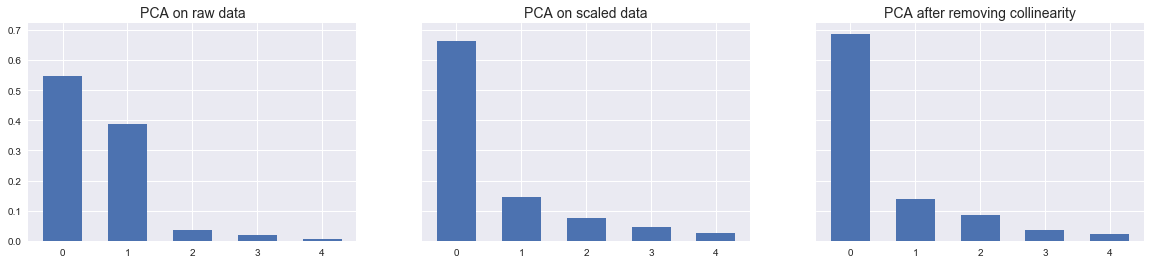

In [111]:
import matplotlib.pyplot as plt

n=['PC1','PC2','PC3','PC4','PC5']
index = np.arange(5)
var=np.vstack([var_1,var_sc,var_sc_coll]).T

# creating pandas datframe from numpy array 'var'
df=pd.DataFrame(var,index=n,columns=['original','scaled','scaled_no_colli'])

# plotting variance data 
%matplotlib inline
fig, ax= plt.subplots(1,3,sharey=True,figsize=(20,4))
r1 = ax[0].bar(index,df['original'],width = 0.6,align='center')
ax[0].set_title('PCA on raw data',fontsize=14)

r2 = ax[1].bar(index,df['scaled'],width = 0.6,align='center')
ax[1].set_title('PCA on scaled data',fontsize=14)

r3 = ax[2].bar(index,df['scaled_no_colli'],width= 0.6,align='center')
#ax[2].set_xticklabels(n)
ax[2].set_title('PCA after removing collinearity',fontsize=14)

### Summary:

* By standardizing the data, PCA performance has improved quite well in capturing variance of the raw data
    
* Removing collinear features allowed the variance from other variables which were previously ignored to be captured by PCA.



### Ploting first and second principal components

* First principal component (PC1) is a linear combination of the features/variables which represents the maximum variance in the data set.
    
* Second principal component (PC2) is also a linear combination of the features/variables which represents the remaining variance in the data set and is uncorrelated with the first principal component (PC1).

In [163]:
import pandas as pd
n=['PC1','PC2','PC3','PC4','PC5']
xx_pca=pd.DataFrame(x_pca,columns = n)
xx_pca.head(3)

,PC1,PC2,PC3,PC4,PC5
0,-0.627727,1.016965,2.481337,-0.953040,0.453395
1,-1.287772,-0.645299,1.421616,-0.718026,0.051027
2,-1.455468,0.467402,2.697539,-0.401164,0.294929


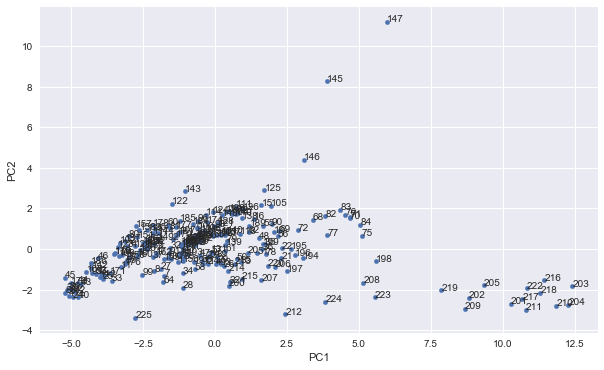

In [164]:
#plotting the first 2 pca compenents
%matplotlib inline
ax = xx_pca.plot(kind='scatter', x='PC1', y='PC2', figsize=(10,6))
for i, d in enumerate(xx_pca.index):
    ax.annotate(d,(xx_pca.iloc[i].PC1, xx_pca.iloc[i].PC2))

In [130]:
from sklearn.preprocessing import StandardScaler
f=traffic_data.iloc[:, 1:4].values
l=traffic_data.iloc[:, 4].values
X_std = StandardScaler().fit_transform(f)

In [165]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_std)
reduced_data

array([[  4.82742551e-01,   2.21116993e-01],
       [ -6.90892674e-01,   4.77789179e-01],
       [  1.19088104e-02,  -3.85891946e-02],
       [ -2.04606653e+00,  -4.20651337e-01],
       [ -2.29332236e+00,  -2.25933811e-01],
       [  2.60992951e-01,   1.36132598e-01],
       [ -5.71751351e-01,   3.09787844e-01],
       [ -1.41346884e+00,   3.42157946e-01],
       [ -1.46547964e+00,  -1.36113595e-01],
       [ -3.15107348e-01,  -7.77625729e-02],
       [ -1.01749385e+00,   1.04497767e-01],
       [ -1.46813792e+00,   1.62683152e-01],
       [ -9.09569004e-01,  -2.40109997e-01],
       [ -4.31590389e-01,  -2.08557985e-01],
       [ -5.94184313e-01,  -4.34250148e-02],
       [  2.47076072e+00,  -1.57662692e-01],
       [  1.35893945e+00,   5.03301118e-02],
       [ -8.48170033e-01,   4.53286545e-02],
       [  2.88742479e-01,  -1.08248039e-01],
       [  9.61551139e-01,  -4.15567062e-01],
       [  4.28073468e-01,   4.16421991e-02],
       [  4.64796181e-01,  -6.14532938e-02],
       [  

In [ ]:
## Copied from https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka

In [172]:
existing_df1existing_df = pd.read_csv("data\Traffic_Violations_Counts.csv", index_col = 0, thousands  = ',')
existing_df1.index.names = ['Dates']
existing_df1.columns.names = ['Channels']

In [173]:
existing_df1.head()

Channels,7th and Park Campus,Cyclists IN,Cyclists OUT,7th underpass,Channel 1 IN,Channel 2 OUT,Channel 3 IN,Channel 4 OUT,B-line Country Club,Channel 1,...,Jordan and 7th,Channel 1 IN.1,Channel 2 OUT.1,N College and RR,S Walnut and Wylie,W 2nd Twin Lakes Bloomfield,Channel 1 IN.2,Channel 2 OUT.2,Channel 3 IN.1,Channel 4 OUT.1
Dates,,,,,,,,,,,,,,,,,,,,,
02/01/2017 0:00,221,113,108,155,66,80,75,33,33,17.0,...,150,83,67,186,92,94,186,92,94,193.0
02/02/2017 0:00,166,76,90,98,68,51,47,25,43,12.0,...,138,78,60,194,91,103,194,91,103,195.0
02/03/2017 0:00,200,109,91,142,58,78,64,31,27,12.0,...,126,78,48,147,69,78,147,69,78,140.0
02/04/2017 0:00,106,69,37,39,67,24,15,45,22,9.0,...,49,33,16,58,23,35,58,23,35,233.0
02/05/2017 0:00,94,57,37,43,51,26,17,31,20,12.0,...,82,51,31,73,38,35,73,38,35,486.0


In [174]:
existing_df=existing_df1.fillna(0)

In [175]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(existing_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [176]:
PCA(copy=True, n_components=2, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [177]:
existing_2d = pca.transform(existing_df)

In [187]:
existing_df_2dd = pd.DataFrame(existing_2d)
existing_df_2dd.index = existing_df.index
existing_df_2dd.columns = ['PC1','PC2']
existing_df_2dd.head()

,PC1,PC2
Dates,,
02/01/2017 0:00,-57.600044,-11.429650
02/02/2017 0:00,-82.122523,-13.227102
02/03/2017 0:00,-129.551288,-75.614128
02/04/2017 0:00,-364.792135,-18.188011
02/05/2017 0:00,-346.998824,239.316087


In [188]:
print(pca.explained_variance_ratio_)

[ 0.54684633  0.38695633]


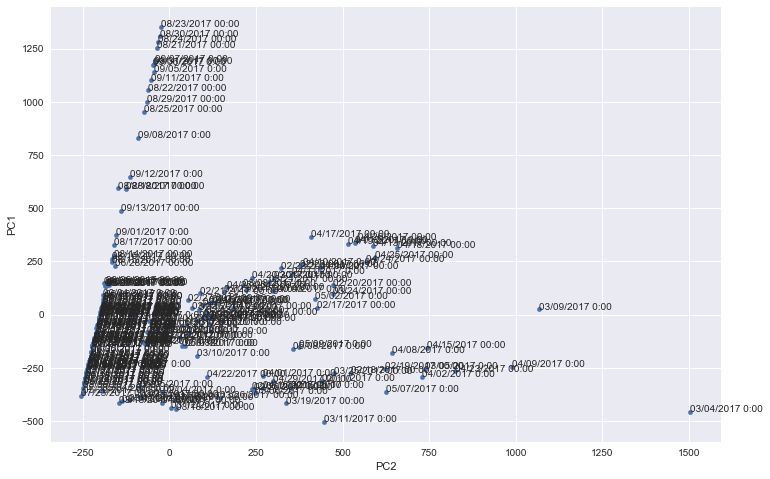

In [189]:
%matplotlib inline
ax = existing_df_2dd.plot(kind='scatter', x='PC2', y='PC1', figsize=(12,8))
for i, channels in enumerate(existing_df.index):
    ax.annotate(channels, (existing_df_2dd.iloc[i].PC2, existing_df_2dd.iloc[i].PC1))

In [190]:
from sklearn.preprocessing import normalize
    
existing_df_2dd['channels_mean'] = pd.Series(existing_df.mean(axis=1), index=existing_df_2dd.index)
channels_mean_max = existing_df_2dd['channels_mean'].max()
channels_mean_min = existing_df_2dd['channels_mean'].min()
channels_mean_scaled = (existing_df_2dd.channels_mean-channels_mean_min) / channels_mean_max
existing_df_2dd['channels_mean_scaled'] = pd.Series(channels_mean_scaled, index=existing_df_2dd.index) 
existing_df_2dd.head()

,PC1,PC2,channels_mean,channels_mean_scaled
Dates,,,,
02/01/2017 0:00,-57.600044,-11.429650,102.166667,0.251125
02/02/2017 0:00,-82.122523,-13.227102,92.041667,0.217996
02/03/2017 0:00,-129.551288,-75.614128,85.625000,0.197001
02/04/2017 0:00,-364.792135,-18.188011,46.291667,0.068303
02/05/2017 0:00,-346.998824,239.316087,62.958333,0.122836


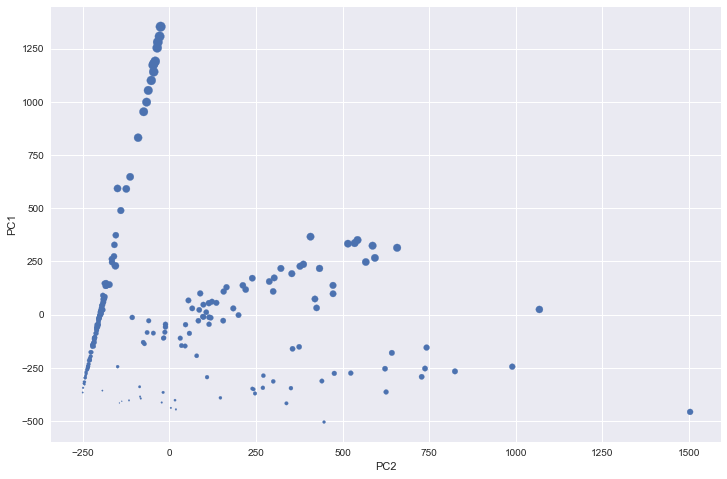

In [191]:
existing_df_2dd.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2dd['channels_mean_scaled']*100, 
    figsize=(12,8))

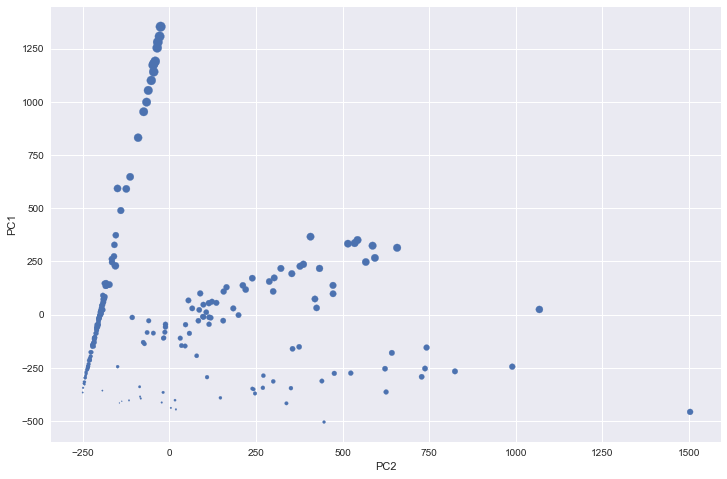

In [196]:
existing_df_2dd['channels_sum'] = pd.Series(existing_df.sum(axis=1), index=existing_df_2dd.index)
channels_sum_max = existing_df_2dd['channels_sum'].max()
channels_sum_min = existing_df_2dd['channels_sum'].min()
channels_sum_scaled =(existing_df_2dd.channels_sum-channels_sum_min) / channels_sum_max
existing_df_2dd['channels_sum_scaled'] = pd.Series(channels_sum_scaled, index=existing_df_2dd.index)
existing_df_2dd.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2dd['channels_sum_scaled']*100, 
    figsize=(12,8))

In [200]:
existing_df_2dd['channels_change'] = pd.Series(existing_df['Cyclists IN']-existing_df['Cyclists OUT'], index=existing_df_2dd.index)
channels_change_max = existing_df_2dd['channels_change'].max()
channels_change_min = existing_df_2dd['channels_change'].min()
channels_change_scaled = (existing_df_2dd.channels_change - channels_change_min) / channels_change_max
existing_df_2dd['channels_change_scaled'] = pd.Series(
        channels_change_scaled, 
        index=existing_df_2dd.index)
existing_df_2dd[['channels_change','channels_change_scaled']].head()

,channels_change,channels_change_scaled
Dates,,
02/01/2017 0:00,5,0.546512
02/02/2017 0:00,-14,0.325581
02/03/2017 0:00,18,0.697674
02/04/2017 0:00,32,0.860465
02/05/2017 0:00,20,0.720930


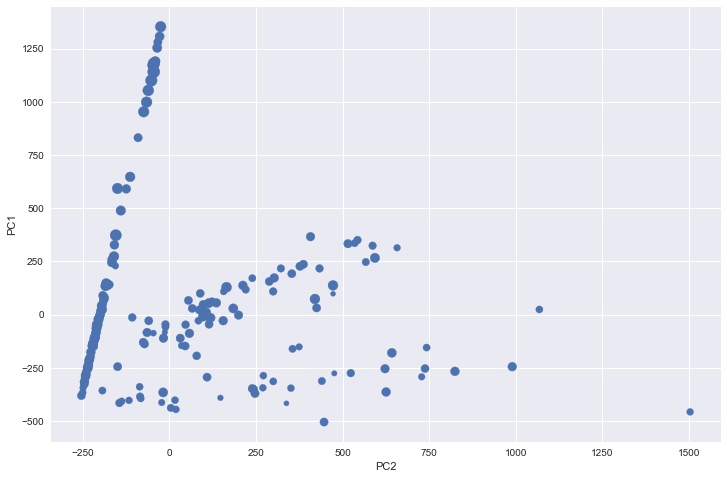

In [202]:
existing_df_2dd.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2dd['channels_change_scaled']*100, 
    figsize=(12,8))

### REFERENCES

* https://github.com/saramille/Breast-cancer-Data-analysis/blob/master/breast%20cancer%20data%20analysis%20colinearity%20and%20dimensional%20reduction.ipynb

* https://github.com/lucko515/dataset-dimensionality-reduction-python/blob/master/LDA/banknotes_dim_reduction_lda.ipynb

* http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

* https://github.com/saramille/Breast-cancer-Data-analysis/blob/master/breast_cancer-classification%20modeling.ipynb

* https://github.com/shellshock1911/Creating-Customer-Segments

* https://github.com/RexGoliath1/Unsupervised/blob/master/DimensionReduce/DimReduce.ipynb

* https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

* https://www.coursera.org/learn/python-machine-learning/lecture/cgzXI/dimensionality-reduction-and-manifold-learning

* https://gist.github.com/bistaumanga/6268985

* http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_2_Linear_Discriminant_Analysis.php

* https://towardsdatascience.com/reducing-dimensionality-from-dimensionality-reduction-techniques-f658aec24dfe

* http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_1_Principal_component_analysis%20_PCA.php

* https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka
